In [380]:
import requests
import time
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier




In [150]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Animals are Jerks

In [151]:

url = 'https://api.pushshift.io/reddit/search/submission'
subreddit = 'AnimalsBeingJerks'
before = 1632922428

jerks = pd.DataFrame()

for _ in range(10):
        
    params = {
        'subreddit': subreddit,
        'size': 100,
        'before': before
    }

    res = requests.get(url, params=params)
    data = res.json()
    
    before = data['data'][-1]['created_utc']
    print(f'before updated to: {before}')
    
    post_df = pd.DataFrame(data['data'])
    jerks = pd.concat([jerks,post_df],ignore_index=True)
    
    time.sleep(3)

before updated to: 1632778859
before updated to: 1632611715
before updated to: 1632455207
before updated to: 1632309880
before updated to: 1632169644
before updated to: 1632066308
before updated to: 1631910554
before updated to: 1631731960
before updated to: 1631511187
before updated to: 1631369336


In [152]:
jerks.head(5)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio,url,url_overridden_by_dest,whitelist_status,wls,link_flair_template_id,removed_by_category,author_cakeday,author_flair_background_color,author_flair_text_color
0,[],False,Camouflaged_Nut_Sack,None,[],None,text,t2_zrlke,False,False,False,[],False,False,1632919986,youtube.com,https://www.reddit.com/r/AnimalsBeingJerks/com...,{},pxuqwj,False,True,False,False,False,True,False,False,,hide img squirrel,[],squirrel,dark,text,False,"{'oembed': {'author_name': 'Dave Garland', 'au...","{'content': '&lt;iframe width=""356"" height=""20...",False,True,14,0,False,all_ads,/r/AnimalsBeingJerks/comments/pxuqwj/squirrel_...,False,rich:video,"{'enabled': False, 'images': [{'id': 'KkfiZ62W...",6,1632919997,1,"{'oembed': {'author_name': 'Dave Garland', 'au...","{'content': '&lt;iframe width=""356"" height=""20...",,True,False,False,AnimalsBeingJerks,t5_2wfjv,4154420,public,https://a.thumbs.redditmedia.com/zYrflxy0VzYhO...,105.0,140.0,Squirrel goes for the jugular.,0,[],1.0,https://www.youtube.com/watch?v=_aGLRdvYTTU,https://www.youtube.com/watch?v=_aGLRdvYTTU,all_ads,6,NaN,NaN,NaN,NaN,NaN
1,[],False,decent694201,None,[],None,text,t2_3tkb6ije,False,False,False,[],False,False,1632919086,youtube.com,https://www.reddit.com/r/AnimalsBeingJerks/com...,{},pxuhqm,False,True,False,False,False,True,False,False,,NaN,[],NaN,dark,text,False,NaN,NaN,False,True,2,0,False,all_ads,/r/AnimalsBeingJerks/comments/pxuhqm/angry_pos...,False,NaN,NaN,6,1632919097,1,NaN,NaN,,True,False,False,AnimalsBeingJerks,t5_2wfjv,4154399,public,default,NaN,NaN,Angry Possum eats a strawberry,0,[],1.0,https://www.youtube.com/watch?v=Ee1ha5WeNng,https://www.youtube.com/watch?v=Ee1ha5WeNng,all_ads,6,NaN,NaN,NaN,NaN,NaN
2,[],False,tarun2619,None,[],None,text,t2_5b0gn8ce,False,False,False,[],False,False,1632917090,/r/AnimalsBeingJerks/comments/pxtybm/playing_d...,https://www.reddit.com/r/AnimalsBeingJerks/com...,{},pxtybm,False,True,False,False,False,True,False,True,,hide img dog,[],dog,dark,text,False,NaN,NaN,False,True,80,0,False,all_ads,/r/AnimalsBeingJerks/comments/pxtybm/playing_d...,False,hosted:video,"{'enabled': False, 'images': [{'id': 'DSHpmK4c...",6,1632917101,1,NaN,NaN,,True,False,False,AnimalsBeingJerks,t5_2wfjv,4154356,public,https://b.thumbs.redditmedia.com/i8leuMAE_46wg...,140.0,140.0,Playing dead,0,[],1.0,https://v.redd.it/6ychovtanfq71,https://v.redd.it/6ychovtanfq71,all_ads,6,df655250-2b1c-11e3-9555-12313d223dbc,NaN,NaN,NaN,NaN
3,[],False,mkrkholil,None,[],None,text,t2_alxm3j9n,False,False,False,[],False,False,1632912885,i.redd.it,https://www.reddit.com/r/AnimalsBeingJerks/com...,{},pxswdo,False,False,False,False,True,False,False,False,,hide img dog,[],dog,dark,text,False,NaN,NaN,False,True,0,0,False,all_ads,/r/AnimalsBeingJerks/comments/pxswdo/hows_the_...,False,image,"{'enabled': True, 'images': [{'id': 'DNgX2Mi6B...",6,1632912896,1,NaN,NaN,,True,False,False,AnimalsBeingJerks,t5_2wfjv,4154282,public,https://b.thumbs.redditmedia.com/vNjxkG88ZDPgl...,140.0,140.0,How's the puppy? The puppy is cute to me!,0,[],1.0,https://i.redd.it/7qmfu3xiafq71.jpg,https://i.redd.it/7qmfu3xi

In [153]:
jerks_words = jerks[['subreddit','title']]

In [154]:
jerks_words;

In [155]:
#jerks_words = jerks_words.drop([48,209,210,211,212,213,214,216,217,218,219,220,221,424,463])

In [156]:
jerks_words.drop_duplicates(inplace=True);

<ipython-input-156-cf1d84481663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jerks_words.drop_duplicates(inplace=True);


# Animals are Bros

In [157]:

url = 'https://api.pushshift.io/reddit/search/submission'
subreddit = 'AnimalsBeingBros'
before = 1632922428

bros = pd.DataFrame()

for _ in range(10):
        
    params = {
        'subreddit': subreddit,
        'size': 100,
        'before': before
    }

    res = requests.get(url, params=params)
    data = res.json()
    
    before = data['data'][-1]['created_utc']
    print(f'before updated to: {before}')
    
    post_df = pd.DataFrame(data['data'])
    bros = pd.concat([bros,post_df],ignore_index=True)
    
    time.sleep(3)

before updated to: 1632750404
before updated to: 1632614038
before updated to: 1632505811
before updated to: 1632317315
before updated to: 1632163144
before updated to: 1632070762
before updated to: 1631892661
before updated to: 1631741959
before updated to: 1631600834
before updated to: 1631439120


In [158]:
bros.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio,url,url_overridden_by_dest,whitelist_status,wls,removed_by_category,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,author_flair_text_color,link_flair_template_id,link_flair_text,banned_by,media_metadata,author_cakeday
0,[],False,rominaalvar,None,[],None,text,t2_cu2t21xt,False,False,False,[],False,False,1632919835,/r/AnimalsBeingBros/comments/pxupcm/yorkie_bri...,https://www.reddit.com/r/AnimalsBeingBros/comm...,{},pxupcm,False,True,False,False,False,True,False,True,,[],dark,text,False,False,True,0,0,False,all_ads,/r/AnimalsBeingBros/comments/pxupcm/yorkie_bri...,False,hosted:video,"{'enabled': False, 'images': [{'id': 'kY8lqzL2...",6,1632919846,1,,True,False,False,AnimalsBeingBros,t5_2wmvy,4398621,public,https://a.thumbs.redditmedia.com/tMTYN40x_UWqQ...,140.0,140.0,Yorkie brings stray kitten home .,0,[],1.0,https://v.redd.it/fwwrybncvfq71,https://v.redd.it/fwwrybncvfq71,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,mkrkholil,None,[],None,text,t2_alxm3j9n,False,False,False,[],False,False,1632913523,i.redd.it,https://www.reddit.com/r/AnimalsBeingBros/comm...,{},pxt25k,False,False,False,False,True,False,False,False,,[],dark,text,False,False,True,0,0,False,all_ads,/r/AnimalsBeingBros/comments/pxt25k/hows_the_p...,False,image,"{'enabled': True, 'images': [{'id': '5UyvWnYnz...",6,1632913535,1,,True,False,False,AnimalsBeingBros,t5_2wmvy,4398502,public,https://a.thumbs.redditmedia.com/Hi5QsFB0VnpxU...,140.0,140.0,How's the puppy? The puppy is cute to me!,0,[],1.0,https://i.redd.it/1p7i2kpncfq71.jpg,https://i.redd.it/1p7i2kpncfq71.jpg,all_ads,6,reddit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,doggiesdos,None,[],None,text,t2_djxt72ft,False,False,False,[],False,False,1632913327,self.AnimalsBeingBros,https://www.reddit.com/r/AnimalsBeingBros/comm...,{},pxt0d4,False,False,False,False,False,False,True,False,,[],dark,text,False,False,True,0,0,False,all_ads,/r/AnimalsBeingBros/comments/pxt0d4/bowls_and_...,False,NaN,NaN,6,1632913339,1,[removed],True,True,False,AnimalsBeingBros,t5_2wmvy,4398497,public,spoiler,NaN,NaN,Bowls and Feeders for Dogs and Cats,0,[],1.0,https://www.reddit.com/r/AnimalsBeingBros/comm...,NaN,all_ads,6,reddit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,jinhyesung,None,[],None,text,t2_ead3wm5v,False,False,False,[],False,False,1632911537,youtube.com,https://www.reddit.com/r/AnimalsBeingBros/comm...,{},pxsle1,False,False,False,False,False,False,False,False,,[],dark,text,False,False,True,0,0,False,all_ads,/r/AnimalsBeingBros/comments/pxsle1/small_baby...,False,rich:video,"{'enabled': False, 'images': [{'id': 'Vj7SC0_C...",6,1632911548,1,,True,False,False,AnimalsBeingBros,t5_2wmvy,4398461,public,https://b.thumbs.redditmedia.com/KnY4_OzFEhB8z...,105.0,140.0,small baby puppies,0,[],1.0,https://youtube.com/watch?v=cuzSLv9rmX8&amp;fe...,https://youtube.com/watch?v=cuzSLv9rmX8&amp;fe...,all_ads,6,reddit,"{'oembed': {'author_name': 'Bowwow Studio', 'a...","{'content': '&lt;iframe width=""356"" height=""20...","{'oembed': {'author_name': 'Bowwow Studio', 'a...","{'content': '&lt;iframe width=""356"" height=""20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4

In [159]:
bros_words = bros[['subreddit','title']]

In [160]:
#bros_words = bros_words.drop([14,27,40,41,42,43,44,45,46,47,48,49,87,103,107,129,142,143,144,146,147,148,149,150,151,152,153,159,164,185,214,216,293,295,296,297,298,300,301,311,266,293,294,410,415,449,455,460,466,475,497,498])

In [161]:
bros_words.drop_duplicates(inplace=True),

<ipython-input-161-9d8fb748fc1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bros_words.drop_duplicates(inplace=True),


(None,)

### Combine 

In [225]:
words = pd.concat([bros_words,jerks_words])

In [226]:
words.head()

,subreddit,title
0,AnimalsBeingBros,Yorkie brings stray kitten home .
1,AnimalsBeingBros,How's the puppy? The puppy is cute to me!
2,AnimalsBeingBros,Bowls and Feeders for Dogs and Cats
3,AnimalsBeingBros,small baby puppies
4,AnimalsBeingBros,Please vote for my post


In [164]:
words.groupby(by=['subreddit']).count()

,title
subreddit,
AnimalsBeingBros,943
AnimalsBeingJerks,972


In [221]:
words['subreddit'].value_counts(normalize=True)

AnimalsBeingJerks    0.507572
AnimalsBeingBros     0.492428
Name: subreddit, dtype: float64

# Count Vectorizer

In [165]:
cv = CountVectorizer(stop_words='english',)

In [166]:
words_vec = pd.DataFrame(cv.fit_transform(words['title']).todense(),columns=cv.get_feature_names())

In [167]:
words_vec.reset_index(inplace=True, drop=True)

In [168]:
subreddit_names = pd.DataFrame(words['subreddit'])

In [169]:
subreddit_names.reset_index(inplace=True, drop=True)

In [170]:
words_vec.head();

In [171]:
words_vec_combine= pd.concat([subreddit_names,words_vec], axis = 1)

In [349]:
words.columns

Index(['subreddit', 'title'], dtype='object')

# EDA

In [173]:
words_vec_combine.groupby(by=words_vec_combine['subreddit']).sum().T.sort_values(by = 'AnimalsBeingBros',ascending = False).head(15)

subreddit,AnimalsBeingBros,AnimalsBeingJerks
dog,90,81
cat,84,105
cute,50,30
baby,43,17
dogs,28,23
animals,27,30
funny,27,23
video,24,15
like,24,26
best,23,10


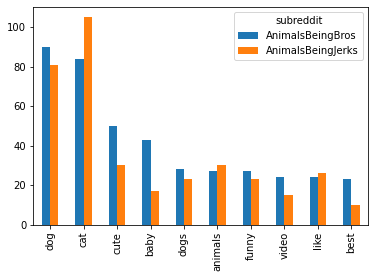

In [350]:
words_vec_combine.groupby(by=words_vec_combine['subreddit']).sum().T.sort_values(by = 'AnimalsBeingBros',ascending = False).head(10).plot(kind='bar');


In [175]:
words_vec_combine.groupby(by=words_vec_combine['subreddit']).sum().T.sort_values(by = 'AnimalsBeingJerks',ascending = False).head(15)

subreddit,AnimalsBeingBros,AnimalsBeingJerks
cat,84,105
dog,90,81
just,20,36
animals,27,30
cute,50,30
like,24,26
new,11,24
funny,27,23
don,3,23
dogs,28,23


<AxesSubplot:>

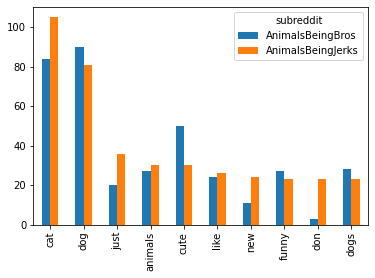

In [203]:
words_vec_combine.groupby(by=words_vec_combine['subreddit']).sum().T.sort_values(by = 'AnimalsBeingJerks',ascending = False).head(10).plot(kind='bar')

# Model 

### Random Forest

In [364]:
features = words_vec_combine.drop(columns = 'subreddit')

In [365]:
X = features

In [366]:
y = words_vec_combine['subreddit']

In [367]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

In [368]:
rfc = RandomForestClassifier(max_depth=5)

In [369]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [370]:
rfc.score(X_train,y_train)

0.6413649025069638

In [371]:
rfc.score(X_test,y_test)

0.5448851774530271

In [372]:
# wow that's bad

### Extra trees

In [186]:
etc = ExtraTreesClassifier()

In [187]:
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [188]:
etc.score(X_train,y_train)

0.9561281337047354

In [189]:
etc.score(X_test,y_test)

0.5762004175365344

### Logistical Regression 

In [190]:
logreg = LogisticRegression()

In [191]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [192]:
logreg.score(X_train,y_train)

0.915041782729805

In [193]:
logreg.score(X_test,y_test)

0.569937369519833

In [379]:
# Ada Boost

In [381]:
ada = AdaBoostClassifier()

In [382]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [384]:
ada.score(X_train,y_train)

0.6427576601671309

In [385]:
ada.score(X_test,y_test)

0.5427974947807933

### Grid Search CV

In [213]:
grid = {
    'n_estimators': [500, 550],
    'max_depth': [None],
    'min_samples_split': [7, 8],
    'min_samples_leaf': [3]
}

gs = GridSearchCV(rfc, param_grid=grid)

In [214]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [3],
                         'min_samples_split': [7, 8],
                         'n_estimators': [500, 550]})

In [215]:
gs.best_score_

0.5905270034843205

In [216]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500}

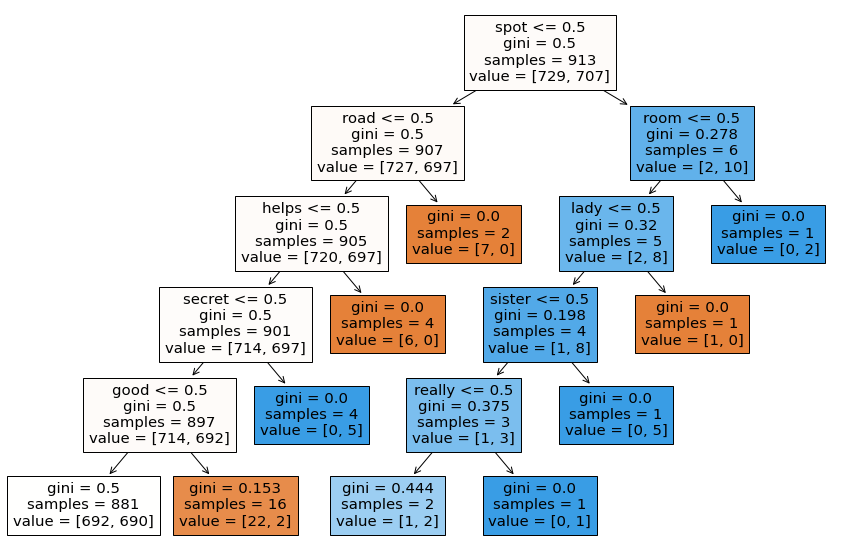

In [378]:
fig = plt.figure(figsize=(15, 10))
plot_tree(rfc.estimators_[0],feature_names=X.columns,filled=True);

# Pipeline with TF-iv

In [227]:
words.head()

,subreddit,title
0,AnimalsBeingBros,Yorkie brings stray kitten home .
1,AnimalsBeingBros,How's the puppy? The puppy is cute to me!
2,AnimalsBeingBros,Bowls and Feeders for Dogs and Cats
3,AnimalsBeingBros,small baby puppies
4,AnimalsBeingBros,Please vote for my post


In [235]:
X = words['title']

In [236]:
y = words['subreddit']

In [237]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, stratify=y)

In [338]:
pipe = Pipeline([
    ('tf-idf', TfidfVectorizer()),
    ('rfc',RandomForestClassifier( min_samples_leaf= 6,min_samples_split=9,n_estimators = 500,))
])

In [339]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tf-idf', TfidfVectorizer()),
                ('rfc',
                 RandomForestClassifier(min_samples_leaf=6, min_samples_split=9,
                                        n_estimators=500))])

In [340]:
pipe.score(X_train,y_train)

0.7151810584958217

In [341]:
pipe.score(X_test,y_test)

0.615866388308977

## Pickle

In [345]:
with open('./Models/pet_pipe.pkl', mode = 'wb') as pickle_out:
    pickle.dump(pipe, pickle_out)